In [1]:
import numpy as np
from scipy.signal import resample_poly
from math import gcd
import zh1

In [2]:
fp = r"\\Diskstation1\file_three\aw\zh1\efd\ulf\201911\CSES_01_EFD_1_L02_A1_097081_20191102_220838_20191102_224323_000.h5"
efd = zh1.EFDULF(fp)

In [3]:
A111_W = efd.dfs['A111_W'].iloc[0,:]

In [4]:
# Example original signal: a 5-second sine wave at 1024 Hz sampling rate
original_sampling_rate = 125  # Hz
original_signal = A111_W

In [5]:
# Define the target frequency range
target_lower_bound = 20  # e.g., 20 Hz
target_upper_bound = 30  # e.g., 30 Hz

# Initialize variables for best frequency and downsampling factor
best_factor = 1
best_frequency = original_sampling_rate  # Start with original frequency

# Iterate over possible downsampling factors to find the best frequency
for factor in range(2, original_sampling_rate + 1):
    new_frequency = original_sampling_rate / factor
    if target_lower_bound <= new_frequency <= target_upper_bound:
        # Update best frequency if closer to target than previous best
        if abs(new_frequency - (target_lower_bound + target_upper_bound) / 2) < abs(best_frequency - (target_lower_bound + target_upper_bound) / 2):
            best_frequency = new_frequency
            best_factor = factor

# Downsampling using the best factor
up = 1  # Upsampling factor
down = best_factor  # Chosen downsampling factor
downsampled_signal = resample_poly(original_signal, up, down)

# Display the results
print(f"Original Sampling Rate: {original_sampling_rate} Hz")
print(f"Chosen Downsampling Factor: {best_factor}")
print(f"Resulting Downsampled Frequency: {best_frequency} Hz")
print(f"Downsampled Signal Length: {len(downsampled_signal)} samples")


Original Sampling Rate: 125 Hz
Chosen Downsampling Factor: 5
Resulting Downsampled Frequency: 25.0 Hz
Downsampled Signal Length: 52 samples


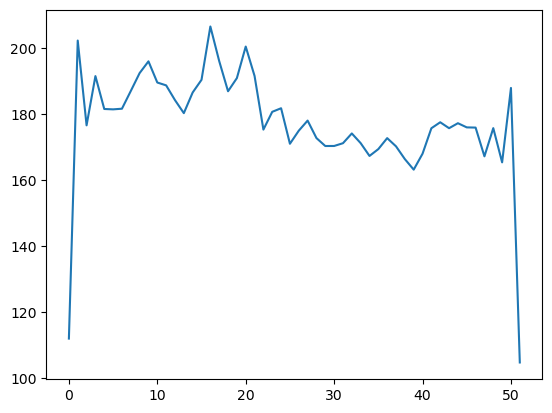

In [7]:
import matplotlib.pyplot as plt
plt.plot(downsampled_signal)
plt.show()

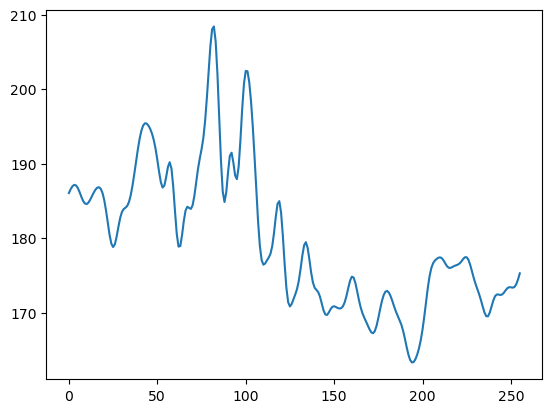

In [8]:
plt.plot(original_signal)